In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc

In [2]:
df = pd.read_csv("match_samps.csv")
df2 = df.drop(["stats.name", "matchId", "assetsId","stats.killPlace", "matchType", "stats.deathType", "map", "stats.rank", "stats.playerId"], axis=1)
value_count = df2['gameMode'].value_counts()
df_value_counts = pd.DataFrame(value_count)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['gameMode', 'num_games_played']
df3 = df2[df2['gameMode']=="solo"]
df3 = df3.drop(columns=["gameMode"])

def f(row):
    if row['stats.winPlace'] <= 5:
        val = 'Top_Five'
    else:
        val = 'Unranked'

    return val
df3['top_five'] = df.apply(f, axis=1)
df3 = df3.rename(columns={'stats.DBNOs':'DBNOs', 'stats.assists':'Assists', 'stats.boosts':'Boosts',
                          'stats.damageDealt':'DamageDealt','stats.headshotKills':'HeadshotKills', 
                          'stats.heals':'Heals', 'stats.killStreaks':'KillStreaks', 'stats.kills':'Kills',
                          'stats.longestKill':'LongestKill','stats.rideDistance':'RideDistance',
                          'stats.roadKills':'VehicleKills','stats.swimDistance':'SwimDistance',
                          'stats.teamKills':'TeamKills', 'stats.timeSurvived':'TimeSurvived',
                          'stats.vehicleDestroys':'VehicleDestroys','stats.walkDistance':'WalkDistance',
                          'stats.weaponsAcquired':'WeaponsAcquired','stats.winPlace':'WinPlace','stats.revives':'Revives'})
df3

,gameDuration,DBNOs,Assists,Boosts,DamageDealt,HeadshotKills,Heals,KillStreaks,Kills,LongestKill,...,RideDistance,VehicleKills,SwimDistance,TeamKills,TimeSurvived,VehicleDestroys,WalkDistance,WeaponsAcquired,WinPlace,top_five
286,2214,0.0,0.0,0.0,100.000000,0.0,0.0,1.0,1.0,0.00000,...,0.0000,0.0,0.0,0.0,1028.0,0.0,268.854000,0.0,63.0,Unranked
287,2214,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,789.0,0.0,28.123253,0.0,88.0,Unranked
288,2214,0.0,0.0,4.0,427.098080,1.0,0.0,1.0,4.0,191.64577,...,2323.3994,0.0,0.0,0.0,1229.0,0.0,1692.429000,4.0,21.0,Unranked
289,2214,0.0,0.0,4.0,199.413650,0.0,0.0,1.0,1.0,0.00000,...,0.0000,0.0,0.0,0.0,1647.0,0.0,1688.476400,0.0,31.0,Unranked
290,2214,0.0,0.0,0.0,25.199999,0.0,0.0,0.0,0.0,0.00000,...,4562.7593,0.0,0.0,0.0,1629.0,0.0,1043.243900,13.0,6.0,Unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,2150,0.0,0.0,0.0,43.537500,0.0,0.0,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,1294.0,0.0,964.296140,0.0,58.0,Unranked
20577,2150,0.0,0.0,0.0,13.545000,0.0,0.0,0.0,0.0,0.00000,...,0.0000,0.0,0.0,0.0,851.0,0.0,231.469160,0.0,89.0,Unranked
20578,2150,0.0,0.0,3.0,438.063300,1.0,1.0,1.0,5.0,59.16622,...,0.0000,0.0,0.0,0.0,1546.0,0.0,4143.685500,3.0,1.0,Top_Five
20579,2150,0.0,0.0,6.0,100.000000,0.0,0.0,1.0,1.0,0.00000,...,0.0000,0.0,0.0,0.0,1838.0,0.0,4439.742000,0.0,22.0,Unranked


In [3]:
target = df3["top_five"]
target_names = ["UnRanked", "Top5"]

In [4]:
data = df3.drop(["top_five", "WinPlace"], axis=1)
feature_names = data.columns
data.head()

,gameDuration,DBNOs,Assists,Boosts,DamageDealt,HeadshotKills,Heals,KillStreaks,Kills,LongestKill,Revives,RideDistance,VehicleKills,SwimDistance,TeamKills,TimeSurvived,VehicleDestroys,WalkDistance,WeaponsAcquired
286,2214,0.0,0.0,0.0,100.000000,0.0,0.0,1.0,1.0,0.00000,0.0,0.0000,0.0,0.0,0.0,1028.0,0.0,268.854000,0.0
287,2214,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0000,0.0,0.0,0.0,789.0,0.0,28.123253,0.0
288,2214,0.0,0.0,4.0,427.098080,1.0,0.0,1.0,4.0,191.64577,0.0,2323.3994,0.0,0.0,0.0,1229.0,0.0,1692.429000,4.0
289,2214,0.0,0.0,4.0,199.413650,0.0,0.0,1.0,1.0,0.00000,0.0,0.0000,0.0,0.0,0.0,1647.0,0.0,1688.476400,0.0
290,2214,0.0,0.0,0.0,25.199999,0.0,0.0,0.0,0.0,0.00000,0.0,4562.7593,0.0,0.0,0.0,1629.0,0.0,1043.243900,13.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9488517745302714

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9613778705636743

In [8]:
# What features are most important to predict top five ranked players
sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_importances = pd.DataFrame(rf.feature_importances_, feature_names)
feature_importances.columns=['Importance']
feature_importances.index.name = "Feature"
feature_importances=feature_importances.sort_values(by = 'Importance', ascending=False)
feature_importances

,Importance
Feature,
TimeSurvived,0.198299
DamageDealt,0.126600
Boosts,0.105865
WalkDistance,0.100117
gameDuration,0.083851
Kills,0.081714
LongestKill,0.072969
WeaponsAcquired,0.068410
RideDistance,0.064042


In [9]:
feature_importances.to_csv('DataTrav/feature_importances_clean.csv', mode='w', header=False)

In [10]:
from sklearn import tree
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [11]:
feature_cols = ['gameDuration', 'Boosts', 'DamageDealt',
             'HeadshotKills', 'Heals', 'Kills',
             'RideDistance', 'VehicleKills', 'TimeSurvived',
             'WalkDistance', 'WeaponsAcquired', 'LongestKill', 
             'RideDistance', 'SwimDistance', 'KillStreaks',
             'DBNOs','Revives','VehicleDestroys']

X = df3[feature_cols]
y = df3.top_five


In [12]:
print(cl('X var samps : {}'.format(X[:20]), attrs = ['bold']))
print(cl('y var samps : {}'.format(y[:20]), attrs = ['bold']))

X var samps :      gameDuration  Boosts  DamageDealt  HeadshotKills  Heals  Kills  \
286          2214     0.0   100.000000            0.0    0.0    1.0   
287          2214     0.0     0.000000            0.0    0.0    0.0   
288          2214     4.0   427.098080            1.0    0.0    4.0   
289          2214     4.0   199.413650            0.0    0.0    1.0   
290          2214     0.0    25.199999            0.0    0.0    0.0   
291          2214     1.0   239.201550            0.0    8.0    2.0   
292          2214     3.0   135.334230            0.0    4.0    1.0   
293          2214     1.0    32.064743            0.0    0.0    0.0   
294          2214     0.0    62.854996            0.0   11.0    0.0   
295          2214     3.0   216.000020            0.0    1.0    2.0   
296          2214     3.0    12.499447            0.0    0.0    0.0   
297          2214     0.0    27.032494            0.0    0.0    1.0   
298          2214     1.0    96.204170            0.0    0.0   

In [13]:
from sklearn.model_selection import train_test_split

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'red'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'red'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'red'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'red'))

X_train shape : (2871, 19)
X_test shape : (958, 19)
y_train shape : (2871,)
y_test shape : (958,)


In [38]:
model = dtc(criterion = 'gini',splitter='best' ,max_depth = 6)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(metrics.accuracy_score(y_test, pred_model)), attrs = ['bold']))
print(cl('Balanced Accuracy Score(avg of recall obtained on each class) of the model is {:.0%}'.format(metrics.balanced_accuracy_score(y_test, pred_model)), attrs = ['bold']))


Accuracy of the model is 96%
Balanced Accuracy Score(avg of recall obtained on each class) of the model is 79%


In [39]:
from sklearn.tree import plot_tree # tree diagram


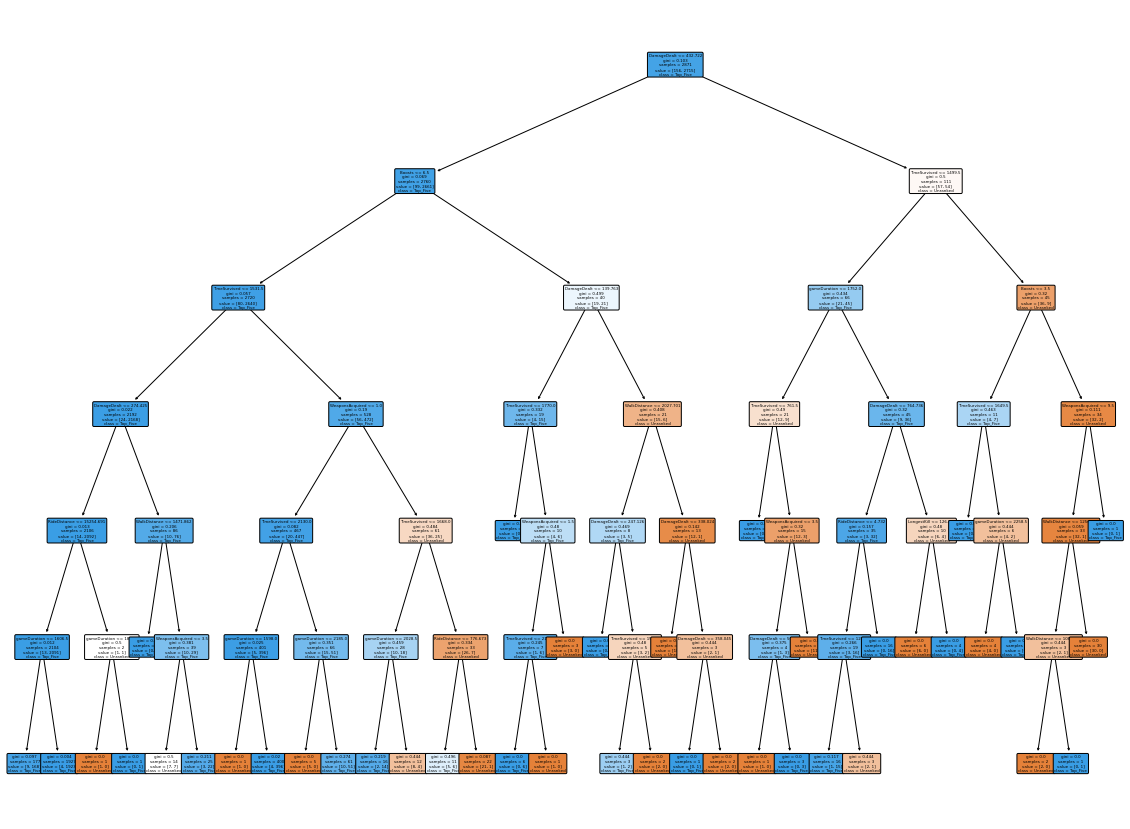

In [40]:
feature_names = df3.columns[:20]
target_names = df3['top_five'].unique().tolist()
plt.figure(figsize=(20,15))
plot_tree(model, fontsize=4,
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)
plt.savefig('DataTrav/tree_visualization1.png') 

In [174]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
class_names = target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)


# Confusion Matrix
## . The diagonal elements represent the number of points for which the predicted label is  
## equal to the true label, while off-diagonal elements are those that are mislabeled by the  
## classifier. The higher the diagonal values of the confusion matrix the better, indicating 
## many correct predictions.

## The figures show the confusion matrix with and without normalization by class support 
## size (number of elements in each class). This kind of normalization can be interesting in 
## case of class imbalance to have a more visual interpretation of which class is being 
## misclassified.

Confusion matrix, without normalization
[[ 17  35]
 [ 11 895]]
Normalized confusion matrix
[[0.32692308 0.67307692]
 [0.01214128 0.98785872]]


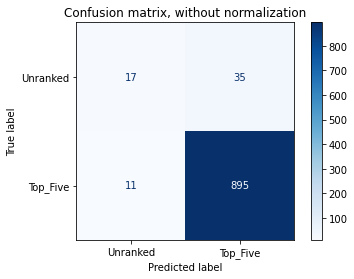

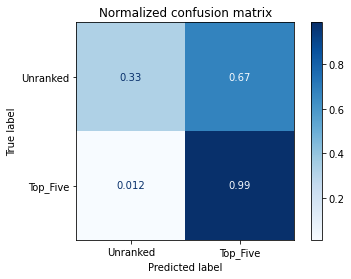

In [175]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()